In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
students_dataset = pd.read_csv(r'D:\DATA for ANALYSIS\Student_Exam_Score_Dataset\Expanded_data_with_more_features.csv')
students_dataset.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-Oct,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-Oct,76,78,75


In [4]:
# correcting values of "5-Oct" into "5-10" in WeeklyStudyHours Column

students_dataset.loc[students_dataset['WklyStudyHours']=='05-Oct', 'WklyStudyHours'] = '5-10'

In [5]:
students_dataset.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


In [6]:
# checking for incorrect values if still present

len(students_dataset[students_dataset['WklyStudyHours']=='05-Oct'])

0

In [7]:
#dropping "unnamed" column 

students_dataset.rename({"Unnamed: 0": "a"}, axis="columns", inplace = True)
students_dataset.head()

,a,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


In [8]:
students_dataset = students_dataset.drop(columns='a')
students_dataset.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


## Finding the distribution of genders: Male and Female

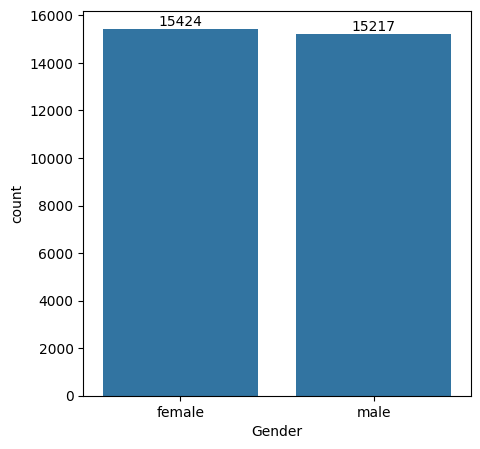

In [9]:
plt.figure(figsize=(5,5))
plot = sns.countplot(data = students_dataset, x = 'Gender')
plot.bar_label(plot.containers[0])
plt.show()

In [10]:
## In the above plot: we've disployed that """The number of Females in the data are more than the number of Males"""

## Analyzing: Does Parent Education Impacts the Scores of the Students?

In [11]:
avg_score = students_dataset.groupby('ParentEduc').agg({"MathScore": "mean", "ReadingScore":"mean", "WritingScore": "mean"})
avg_score

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


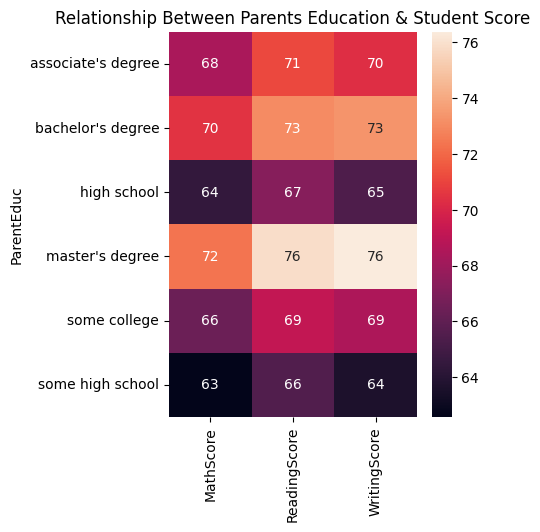

In [12]:
plt.figure(figsize=(4,5))
sns.heatmap(avg_score, annot=True)
plt.title("Relationship Between Parents Education & Student Score")
plt.show()

In [13]:
## Yes, Parent Education is Impacting the scores of the students in all subjects. 
## Students with masters or bachelors qualified parents tend to score higher than the students with high school qualified parents.

## Analyzing: Does Sport Practice Impacts the Scores of the Students?


In [14]:
gb_sport = students_dataset.groupby("PracticeSport").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
gb_sport

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


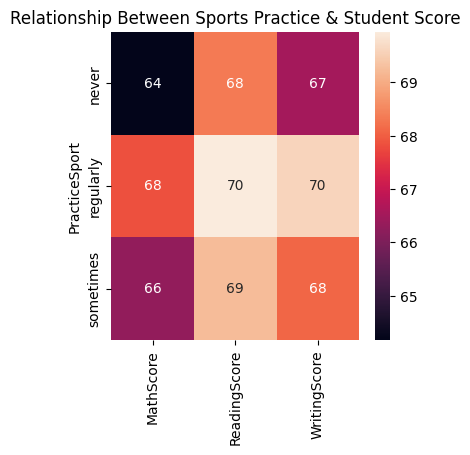

In [15]:
## lets again make a plot in heatmap

plt.figure(figsize=(4,4))
sns.heatmap(gb_sport, annot=True)
plt.title("Relationship Between Sports Practice & Student Score")
plt.show()

In [16]:
## Practing Sport is having negligible Impact on the Students Scores. 
## A student who practice sport regularly scores around same as the student who never plays a sport.

In [17]:
students_dataset.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


# Checking if Weekly Study Hours Affects Students Score

In [18]:
studyhours_score = students_dataset.groupby("WklyStudyHours").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
studyhours_score

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5-10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


In [19]:
## Maths Score is getting affected by the number of hours a student studies it. 
##So, we can say that a student with less than 5 hours of study week scores less than the student who put more than 10 hours.
## Reading and Writing Score shows negligible impact.

# Distribution of Ethnic Groups through Pie Chart

In [26]:
students_dataset['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [35]:
## counting each group

groupA = students_dataset.loc[(students_dataset["EthnicGroup"] == "group A")].count()
groupB = students_dataset.loc[(students_dataset["EthnicGroup"] == "group B")].count()
groupC = students_dataset.loc[(students_dataset["EthnicGroup"] == "group C")].count()
groupD = students_dataset.loc[(students_dataset["EthnicGroup"] == "group D")].count()
groupE = students_dataset.loc[(students_dataset["EthnicGroup"] == "group E")].count()


In [37]:
count_list = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

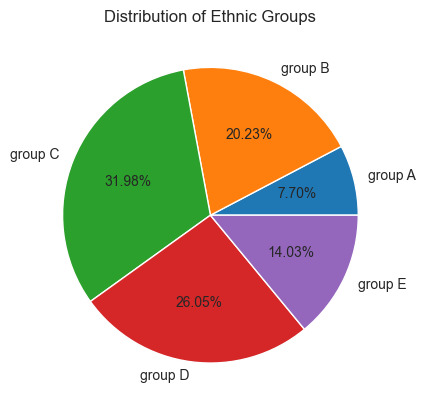

In [71]:
sns.set_style("whitegrid")
labels = ["group A", "group B", "group C", "group D", "group E"]

plt.title('Distribution of Ethnic Groups')
plt.pie(count_list, labels = labels, autopct = '%1.2f%%')
plt.show()